# Tutorial de Proyecto de Regresión Logística

## Paso 1: Recopilación de datos

In [2]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")

total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Definir la ruta donde se guardará el DataFrame original

ruta_data_frame_original = r"C:/Users/Efrain Almeida/Documents/4Geeks Academy/02 Proyectos/efrainnalmeida-my-first-ml-algorithm/data/raw/total_data.csv"

# Guardar el DataFrame en formato CSV

total_data.to_csv(ruta_data_frame_original, index=False, encoding='utf-8')

In [4]:
# Crear una copia del DataFrame original

interim_data = total_data.copy()

# Verificar que la copia se ha realizado correctamente

interim_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Definir la ruta donde se guardará el DataFrame de datos intermedios

ruta_data_frame_intermedio = r"C:/Users/Efrain Almeida/Documents/4Geeks Academy/02 Proyectos/efrainnalmeida-my-first-ml-algorithm/data/interim/interim_data.csv"

# Guardar el DataFrame en formato CSV

interim_data.to_csv(ruta_data_frame_intermedio, index=False, encoding='utf-8')

## Paso 2: Exploración y limpieza de datos

In [6]:
# Obtener las dimensiones

interim_data.shape

(41188, 21)

El DataFrame contiene 41.188 registros (filas) y 21 variables (columnas)

In [7]:
# Obtener información sobre tipos de datos y valores no nulos

interim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

🏗 **Consideraciones para Preprocesamiento**

- **Variables categóricas (`object`)**: `job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, `day_of_week`, `poutcome`, `y`.

- **Variables numéricas (`int64`, `float64`)**: `age`, `duration`, `campaign`, `pdays`, `previous`, `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`.

### Eliminar duplicados

In [8]:
interim_data = interim_data.drop_duplicates().reset_index(drop = True)

interim_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
# Obtener las dimensiones

interim_data.shape

(41176, 21)

Después de eliminar los duplicados, el DataFrame contiene 41.176 registros (filas) y 21 variables (columnas); es decir, contiene 12 registros que el DataFrame original.

## Paso 3: Ingeniería de características

### Análisis de outliers

In [10]:
interim_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


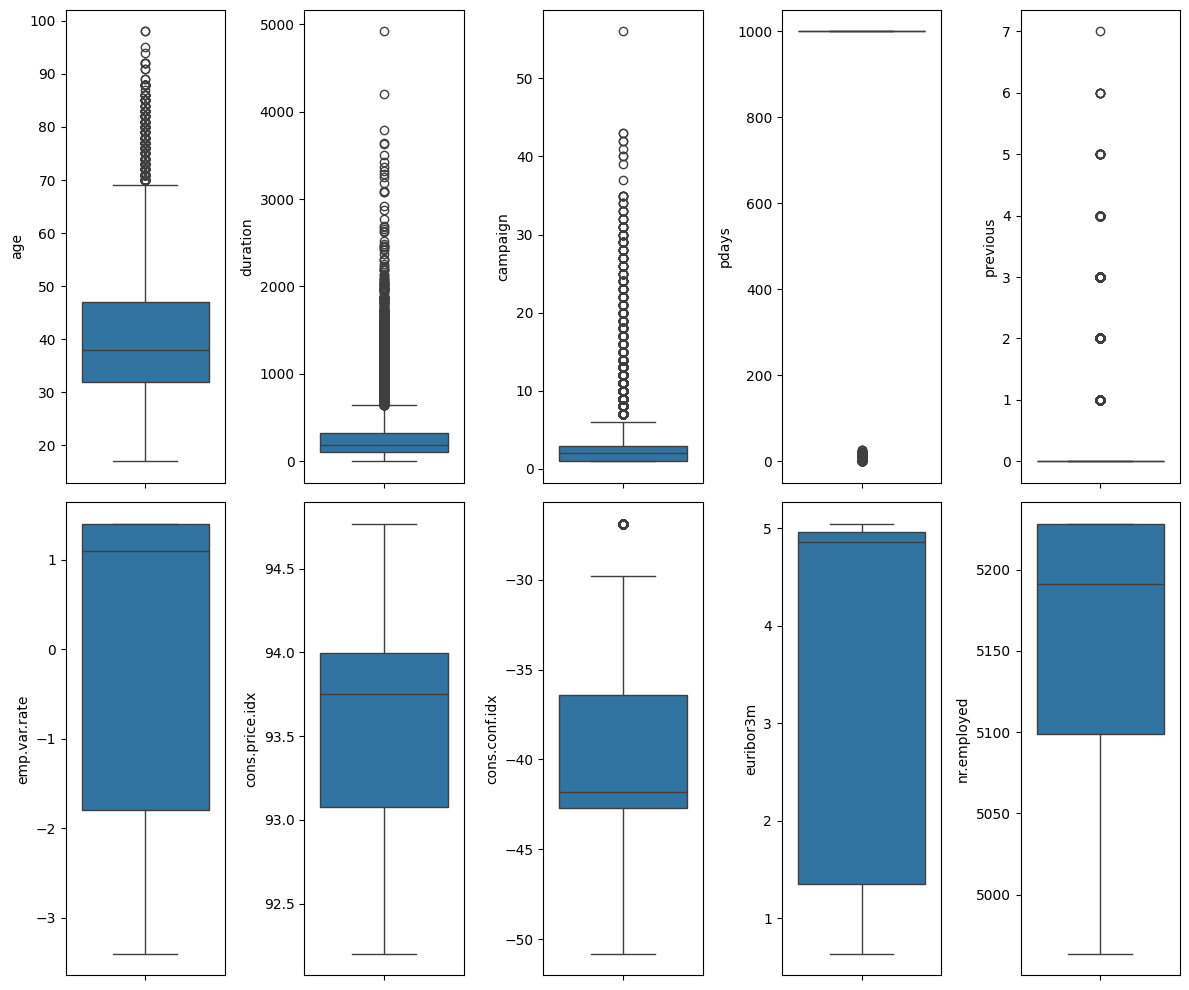

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 5, figsize=(12, 10))

sns.boxplot(ax=axes[0, 0], data=interim_data, y = "age")
sns.boxplot(ax=axes[0, 1], data=interim_data, y = "duration")
sns.boxplot(ax=axes[0, 2], data=interim_data, y = "campaign")
sns.boxplot(ax=axes[0, 3], data=interim_data, y = "pdays")
sns.boxplot(ax=axes[0, 4], data=interim_data, y = "previous")
sns.boxplot(ax=axes[1, 0], data=interim_data, y = "emp.var.rate")
sns.boxplot(ax=axes[1, 1], data=interim_data, y = "cons.price.idx")
sns.boxplot(ax=axes[1, 2], data=interim_data, y = "cons.conf.idx")
sns.boxplot(ax=axes[1, 3], data=interim_data, y = "euribor3m")
sns.boxplot(ax=axes[1, 4], data=interim_data, y = "nr.employed")

plt.tight_layout()
plt.show()

### Análisis de valores faltantes

In [12]:
# Count NaN

interim_data.isnull().sum().sort_values(ascending = False) / len(interim_data)

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

No hay valores faltantes.

### Escalado de valores

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Transformar variable objetivo a binaria
interim_data["y"] = interim_data["y"].map({"yes": 1, "no": 0})

# Variables categóricas
categorical_vars = ["job", "marital", "education", "default", "housing", 
                    "loan", "contact", "month", "day_of_week", "poutcome"]

# Variables numéricas
numeric_vars = ["age", "duration", "campaign", "pdays", "previous", 
                "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

# One-Hot Encoding para las categóricas
data_dummies = pd.get_dummies(interim_data[categorical_vars], drop_first=True)

# Concatenar con las variables numéricas
X = pd.concat([interim_data[numeric_vars], data_dummies], axis=1)
y = interim_data["y"]

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar solo las variables numéricas
scaler = MinMaxScaler()
X_train_scaled_numeric = scaler.fit_transform(X_train[numeric_vars])
X_test_scaled_numeric = scaler.transform(X_test[numeric_vars])

# Cambiar explícitamente el tipo de las columnas numéricas a float64 para evitar el warning
X_train[numeric_vars] = X_train[numeric_vars].astype("float64")
X_test[numeric_vars] = X_test[numeric_vars].astype("float64")

# Sustituir las columnas numéricas por sus versiones escaladas (ya compatibles)
X_train.loc[:, numeric_vars] = X_train_scaled_numeric
X_test.loc[:, numeric_vars] = X_test_scaled_numeric

## Paso 4: Selección de características

In [14]:
from sklearn.feature_selection import SelectKBest, f_classif

# Asegurar que los índices estén limpios
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Selección de características
selector = SelectKBest(score_func=f_classif, k=5)
X_train_sel_array = selector.fit_transform(X_train, y_train)
X_test_sel_array = selector.transform(X_test)

# Obtener nombres de columnas seleccionadas
selected_cols = X_train.columns[selector.get_support()]

# Crear DataFrames con índices alineados
X_train_sel = pd.DataFrame(X_train_sel_array, columns=selected_cols, index=X_train.index)
X_test_sel = pd.DataFrame(X_test_sel_array, columns=selected_cols, index=X_test.index)

# Añadir la variable objetivo a los DataFrames seleccionados
X_train_sel["y"] = y_train
X_test_sel["y"] = y_test

In [15]:
X_train_sel.head()

,duration,pdays,euribor3m,nr.employed,poutcome_success,y
0,0.058154,1.0,0.980503,1.000000,0.0,0
1,0.036194,1.0,0.958966,1.000000,0.0,0
2,0.020943,1.0,0.981410,1.000000,0.0,0
3,0.027450,1.0,0.958059,0.859735,0.0,0
4,0.084994,1.0,0.148946,0.512287,0.0,0


In [16]:
X_test_sel.head()

,duration,pdays,euribor3m,nr.employed,poutcome_success,y
0,0.296869,1.0,0.143278,0.425709,0.0,1
1,0.050427,1.0,0.150759,0.512287,0.0,0
2,0.055917,1.0,0.073679,0.000000,0.0,1
3,0.037820,1.0,0.150759,0.512287,0.0,0
4,0.037414,1.0,0.981410,1.000000,0.0,0


### Guardar los datos limpios

In [17]:
# Guardar a CSV
X_train_sel.to_csv("C:/Users/Efrain Almeida/Documents/4Geeks Academy/02 Proyectos/efrainnalmeida-my-first-ml-algorithm/data/processed/clean_train.csv", index=False)
X_test_sel.to_csv("C:/Users/Efrain Almeida/Documents/4Geeks Academy/02 Proyectos/efrainnalmeida-my-first-ml-algorithm/data/processed/clean_test.csv", index=False)

## Paso 5: Modelo de regresión logística

In [18]:
# Leer los datos procesados

train_data = pd.read_csv("C:/Users/Efrain Almeida/Documents/4Geeks Academy/02 Proyectos/efrainnalmeida-my-first-ml-algorithm/data/processed/clean_train.csv")
test_data = pd.read_csv("C:/Users/Efrain Almeida/Documents/4Geeks Academy/02 Proyectos/efrainnalmeida-my-first-ml-algorithm/data/processed/clean_test.csv")

In [19]:
train_data.head()

,duration,pdays,euribor3m,nr.employed,poutcome_success,y
0,0.058154,1.0,0.980503,1.000000,0.0,0
1,0.036194,1.0,0.958966,1.000000,0.0,0
2,0.020943,1.0,0.981410,1.000000,0.0,0
3,0.027450,1.0,0.958059,0.859735,0.0,0
4,0.084994,1.0,0.148946,0.512287,0.0,0


In [20]:
test_data.head()

,duration,pdays,euribor3m,nr.employed,poutcome_success,y
0,0.296869,1.0,0.143278,0.425709,0.0,1
1,0.050427,1.0,0.150759,0.512287,0.0,0
2,0.055917,1.0,0.073679,0.000000,0.0,1
3,0.037820,1.0,0.150759,0.512287,0.0,0
4,0.037414,1.0,0.981410,1.000000,0.0,0


In [21]:
# Establecer X_train, y_train, X_test, y_test

X_train = train_data.drop(["y"], axis = 1)
y_train = train_data["y"]
X_test = test_data.drop(["y"], axis = 1)
y_test = test_data["y"]

In [22]:
# Modelo de regresión logística

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
# Predicciones

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [24]:
coef = pd.Series(model.coef_[0], index=X_train.columns)
print(coef.sort_values(ascending=False))

duration            19.659211
poutcome_success     0.696163
euribor3m           -0.339814
pdays               -0.918179
nr.employed         -3.201644
dtype: float64


🧠 ¿Qué significa cada uno?

Los coeficientes representan el impacto marginal (log-odds) de cada variable sobre la probabilidad de que y = 1 (es decir, que el cliente sí contrate el depósito).

🔼 Coeficientes positivos → aumentan la probabilidad de y = 1:

- duration (19.66): mientras más larga fue la llamada, mucho más probable que el cliente diga sí.

- ⚠️ Este valor es alto porque duration está escalado (MinMaxScaler).

- poutcome_success (0.70): si la campaña previa fue exitosa, hay más chance de éxito ahora.

🔽 Coeficientes negativos → disminuyen la probabilidad de y = 1:

- euribor3m (-0.34): tasas más altas se asocian con menor probabilidad de contratación.

- pdays (-0.92): mientras más días pasaron desde la última campaña, menos probabilidad de éxito.

- nr.employed (-3.20): más empleados (indicador económico fuerte) → menor necesidad de ahorro/depósito.

🧩 Nota sobre `duration`

`duration` suele tener una correlación muy fuerte con el target, pero es una variable que no se conoce antes de que el cliente responda, así que:

- 🔒 En problemas reales, a menudo se excluye duration del modelo para evitar data leakage.

In [25]:
# Evaluación

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [38]:
# Resultados

print(f'Exactitud: {accuracy:.4f}') # qué proporción de predicciones fueron correctas
print(f'Precisión: {precision:.4f}') # de todas las veces que el modelo dijo "sí", ¿cuántas fueron realmente "sí"?
print(f'Recall: {recall:.4f}') # de todos los casos reales "sí", ¿cuántos encontró el modelo?
print(f'AUC: {roc_auc:.4f}') # área bajo la curva ROC, que mide la capacidad del modelo para distinguir entre clases

Exactitud: 0.9010
Precisión: 0.6548
Recall: 0.3399
AUC: 0.9110


📌 Interpretación:

- ✅ AUC = 0.91 → Excelente capacidad del modelo para distinguir entre clases.

- ✅ Exactitud = 0.90 → Muy alta, pero ojo...

- ⚠️ Recall = 0.34 → El modelo está fallando al detectar muchos positivos.

- ⚠️ Precisión = 0.65 → Cuando predice "sí", acierta un 65% de las veces.

Esto es típico cuando:

- La clase positiva (y=1) es minoritaria (desbalance de clases).

- El modelo prefiere predecir “no” para maximizar la exactitud.

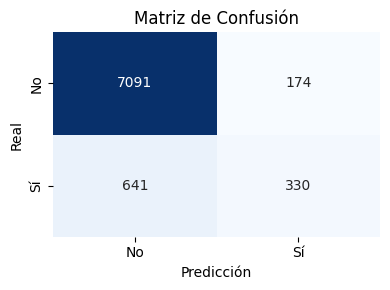

In [27]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar con heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No", "Sí"], yticklabels=["No", "Sí"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.tight_layout()
plt.show()

🧠 ¿Qué dice esto?

- El modelo es muy bueno prediciendo los "No" (alta especificidad).

- Pero está fallando en detectar los "Sí" (recall bajo).

- Hay problemas de desbalance de clases.

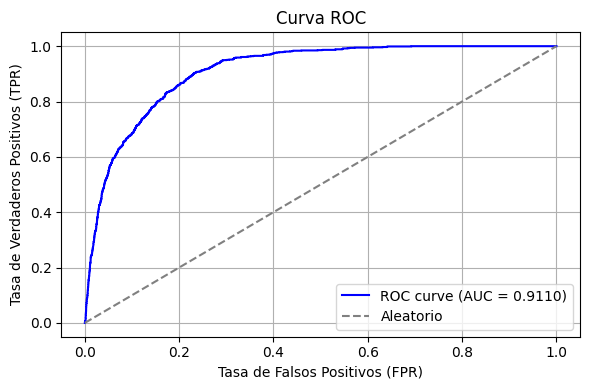

In [41]:
# Curva ROC

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Aleatorio")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

## Paso 6: Optimización del modelo

In [29]:
from sklearn.model_selection import GridSearchCV
import warnings

# Evitar que se impriman advertencias innecesarias (pero no silenciar errores críticos)
warnings.filterwarnings("ignore")

# Definimos los hiperparámetros y sus posibles valores

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializar GridSearchCV
grid = GridSearchCV(estimator=model,
                    param_grid=hyperparams,
                    scoring="roc_auc",
                    cv=5,
                    n_jobs=-1,
                    verbose=1)

# Ajustar el modelo
grid.fit(X_train, y_train)

# Resultados
print("✅ Mejores hiperparámetros:", grid.best_params_)
print("🎯 Mejor AUC:", round(grid.best_score_, 4))

Fitting 5 folds for each of 140 candidates, totalling 700 fits
✅ Mejores hiperparámetros: {'C': 0.001, 'penalty': None, 'solver': 'lbfgs'}
🎯 Mejor AUC: 0.9211


In [34]:
# Reentrenar el modelo con los mejores hiperparámetros

best_model = LogisticRegression(C=0.001, penalty=None, solver="lbfgs", max_iter=1000)
best_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluación - Best Model

conf_matrix_best = confusion_matrix(y_test, y_pred_best)
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_prob_best)
roc_auc_best = auc(fpr_best, tpr_best)

In [ ]:
# Resultados - Best Model

print(f'Exactitud: {accuracy_best:.4f}') 
print(f'Precisión: {precision_best:.4f}') 
print(f'Recall: {recall_best:.4f}') 
print(f'AUC: {roc_auc_best:.4f}')

Exactitud: 0.9023
Precisión: 0.6543
Recall: 0.3625
AUC: 0.9128


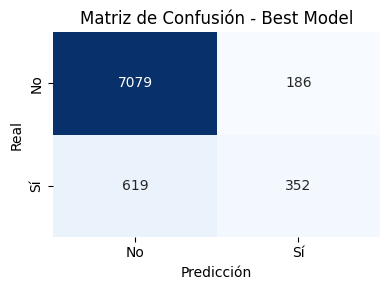

In [ ]:
# Calcular la matriz de confusión - Best Model
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Visualizar con heatmap - Best Model
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No", "Sí"], yticklabels=["No", "Sí"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Best Model")
plt.tight_layout()
plt.show()

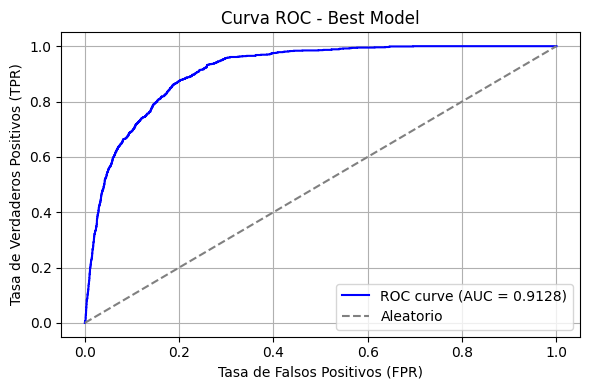

In [43]:
# Curva ROC - Best Model

plt.figure(figsize=(6, 4))
plt.plot(fpr_best, tpr_best, color="blue", label=f"ROC curve (AUC = {roc_auc_best:.4f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Aleatorio")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC - Best Model")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
import pickle

# Ruta donde guardar el modelo
ruta_modelo = "C:/Users/Efrain Almeida/Documents/4Geeks Academy/02 Proyectos/efrainnalmeida-my-first-ml-algorithm/models/logistic_model.pkl"

# Guardar el modelo
with open(ruta_modelo, "wb") as file:
    pickle.dump(best_model, file)

print("✅ Modelo guardado correctamente.")

✅ Modelo guardado correctamente.
